In [1]:
import cv2
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt

## Data preparation and Visualization

In [2]:
p=Path("Images/")
dirs=p.glob('*') # Generator object for all files and folder inside Images
dirs

<generator object Path.glob at 0x0F874AA8>

In [3]:
labels_dict={'cat': 0,
            'dog': 1,
            'horse': 2,
            'human': 3}
labels_list=['cat', 'dog', 'horse', 'human']

In [4]:
# Reading images and making labels
image_data=[]
labels=[]
for folder_dir in dirs:
    label=str(folder_dir).split('\\')[-1][:-1]
    for img_path in folder_dir.glob('*.jpg'):
        img=cv2.imread(str(img_path))
        img=cv2.resize(img, (50, 50))
        img_array=np.asarray(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
image_data=np.array(image_data)
labels=np.array(labels)

In [5]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [6]:
# Randomizing the data
import random
combined=list(zip(image_data, labels)) # List of tuples of image label pair
random.shuffle(combined)
image_data[:], labels[:]=zip(*combined) # Unzipping
print(labels)

[0 2 1 0 2 3 0 1 0 3 1 2 0 2 3 2 3 0 3 1 0 2 3 0 1 3 0 2 3 1 1 1 0 2 2 3 0
 2 1 0 0 2 2 3 2 2 3 3 0 0 3 1 1 3 3 2 1 3 1 2 1 2 2 1 0 1 0 2 1 1 0 0 3 0
 2 2 0 3 2 3 1 0 2 1 2 3 0 3 1 0 3 0 0 2 1 3 2 1 0 1 1 3 0 1 1 2 1 3 0 1 0
 2 1 2 2 0 2 2 0 0 2 1 3 0 3 3 2 3 3 0 0 3 0 0 3 0 2 2 0 0 2 0 1 1 2 2 2 0
 1 1 2 1 0 3 2 3 1 2 1 3 0 0 3 2 1 2 3 0 1 2 2 1 2 2 3 0 0 2 2 3 3 1 3 0 0
 3 2 1 1 3 0 2 3 0 3 2 0 1 1 1 0 3 0 2 3 3 0 0 2 0 0 3 0 1 3 0 0 3 2 0 1 0
 1 3 1 0 0 0 0 3 0 3 1 1 2 1 1 3 2 0 1 0 2 0 0 1 1 1 1 3 1 1 3 3 0 0 3 1 3
 0 0 0 1 1 3 0 2 2 1 1 3 1 2 0 1 2 1 3 0 0 0 3 2 2 1 2 2 2 3 0 2 1 2 2 1 0
 3 1 1 3 3 1 0 2 2 3 2 3 1 3 3 0 1 0 0 1 1 3 0 0 2 2 2 1 1 3 2 3 0 0 0 1 2
 3 1 3 1 2 3 0 1 3 3 2 1 1 3 3 2 0 2 2 1 2 1 0 2 1 0 1 2 0 3 1 1 3 0 2 3 2
 2 3 3 2 2 1 0 1 0 0 2 2 3 1 3 1 1 2 2 3 1 1 2 0 3 3 1 0 0 2 1 2 0 2 2 0 0
 0 3 3 3 0 3 0 1 3 3 1 0 2 1 1 2 0 2 0 1 3 3 3 1 0 0 2 0 1 2 3 0 2 1 1 2 0
 3 3 2 2 1 1 1 0 2 0 0 0 1 0 2 1 3 1 0 1 0 3 2 3 0 3 2 0 1 0 1 1 3 3 0 1 3
 0 2 2 0 2 3 2 2 1 2 1 0 

In [7]:
# Visualization
def dispImg(img, label):
    print(labels_list[label])
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

cat


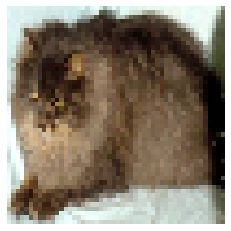

horse


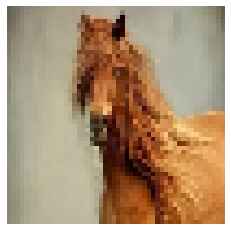

dog


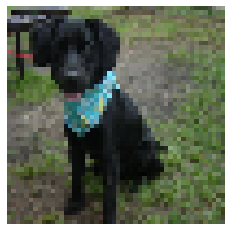

cat


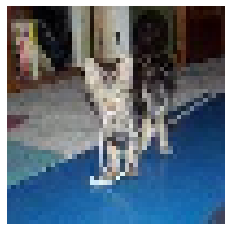

horse


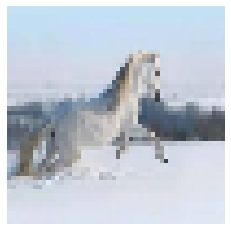

human


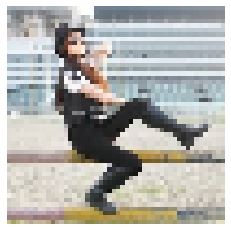

cat


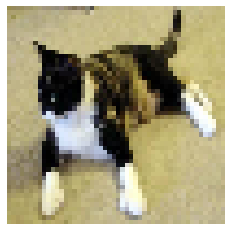

dog


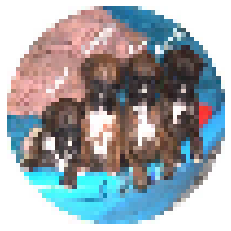

cat


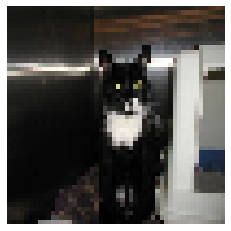

human


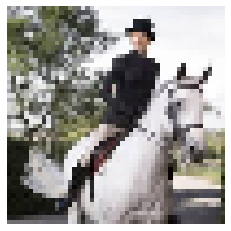

In [8]:
for i in range(10):
    dispImg(image_data[i], labels[i])

## SVM Classifier

In [9]:
class SVM:
    def __init__(self, c=0.1):
        self.c=c
        self.w=0
        self.b=0
    def hingeLoss(self, w, b, X, Y):
        loss=0.0
        loss+=0.5*np.dot(w, w.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(w, X[i].T)+b)
            loss+=self.c*max(0, (1-ti))
        return loss[0][0] ## Since loss has a shape of 1X1
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, max_itr=300):
        no_of_samples=X.shape[0]
        no_of_features=X.shape[1]
        n=learning_rate
        c=self.c
        # Initialize the model parameters
        w=np.zeros((1, no_of_features)) # w is taken as a column matrix(1Xn) instead of row matrix(nX1)
        b=0
        losses=[]
        # Batch gradient with random shuffling
        for i in range(max_itr):
            l=self.hingeLoss(w, b, X, Y)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            for batch_start in range(0, no_of_samples, batch_size):
                grad_w=0
                grad_b=0
                # Iterate for all examples in the batch
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        idx=ids[j]
                        ti=Y[idx]*(np.dot(w, X[idx].T)+b)
                        if ti<1:
                            grad_w+=c*Y[idx]*X[idx]
                            grad_b=c*Y[idx]
                # Gradient for batch is ready
                w=w-n*w+n*grad_w
                b=b+n*grad_b
            losses.append(l)
        self.w=w
        self.b=b
        return w, b, losses

## One vs One scheme

In [10]:
# Reshaping the features
m=image_data.shape[0]
image_data=image_data.reshape((m, -1)) # Flattening
image_data=np.array(image_data, dtype='float32')/255.0
classes_no=len(labels_list)
print(classes_no)

4


In [11]:
# Grouping data according to labels
def classWiseData(X, Y):
    data={}
    for i in range(classes_no):
        data[i]=[]
    for i in range(X.shape[0]):
        data[Y[i]].append(X[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [12]:
data=classWiseData(image_data, labels)
print(data.keys())
print(data[0].shape)

dict_keys([0, 1, 2, 3])
(202, 7500)


In [13]:
def getDataPairSVM(d1, d2):
    l1, l2=d1.shape[0], d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    pair_data=np.zeros((samples, features))
    pair_labels=np.zeros((samples,))
    pair_data[:l1, :]=d1
    pair_data[l1:, :]=d2
    pair_labels[:l1]=-1
    pair_labels[l1:]=1
    return pair_data, pair_labels

In [14]:
svm=SVM(1.0)
plt.style.use('classic')
def trainSVMs():
    svm_classifiers={}
    for i in range(classes_no):
        svm_classifiers[i]={}
        for j in range(i+1, classes_no):
            Xpair, Ypair=getDataPairSVM(data[i], data[j])
            w, b, losses=svm.fit(Xpair, Ypair, 50, 0.00001, 1000)
            svm_classifiers[i][j]=(w, b)
            plt.plot(losses)
            plt.title(labels_list[i]+' vs '+labels_list[j])
            plt.xlabel('Iterations')
            plt.ylabel('Loss')
            plt.show()
    return svm_classifiers

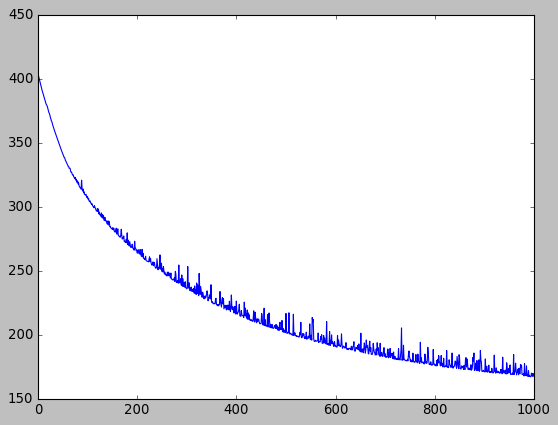

[404.0, 402.3784555442153, 400.75704578272854, 399.1358859887501, 397.64811550575104, 396.1573801763439, 394.53658279363015, 392.9159822323849, 391.29554917837663, 389.8026584646289, 388.68477318551845, 387.5069871318246, 385.8890773666132, 384.5387162659801, 383.46288432265237, 382.1700046174343, 380.59468349729053, 379.62273511170287, 379.07380496355705, 378.0589216779922, 376.4399783555919, 374.8211989521269, 373.48494980698257, 372.8457532874451, 371.3206448105961, 369.7023164026266, 368.2353361976285, 367.03026984715154, 366.3759184858698, 364.7939446145675, 363.43440076532227, 362.19324367017043, 361.0344858035156, 359.82958778812593, 358.64925915788376, 357.52644119534017, 356.3221381240019, 355.1593836925815, 353.99601762093585, 352.80713912376024, 351.71473643567384, 350.74583581032334, 349.5723559444219, 348.46582066317484, 347.4862262073899, 346.4149621544875, 345.298659725354, 344.2454148238755, 343.2594341414127, 342.18135380690387, 341.17120519334156, 340.2312488747407, 3

In [15]:
# Testing classifier cat vs dog
mySVM  = SVM(1.0)
xp, yp  = getDataPairSVM(data[0],data[1])
w,b,losses  = mySVM.fit(xp, yp, 50, 0.00001, 1000)
plt.plot(losses)
plt.show()
print(losses)

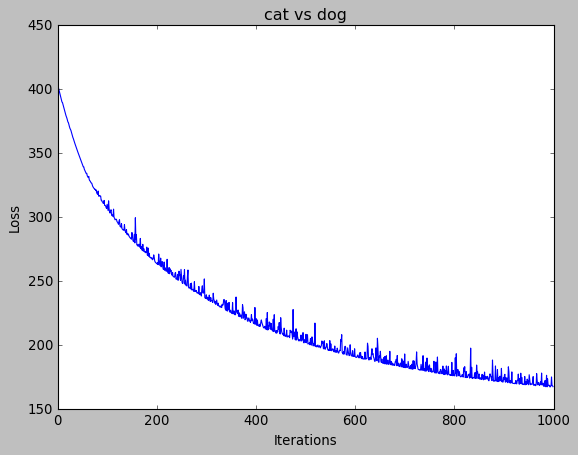

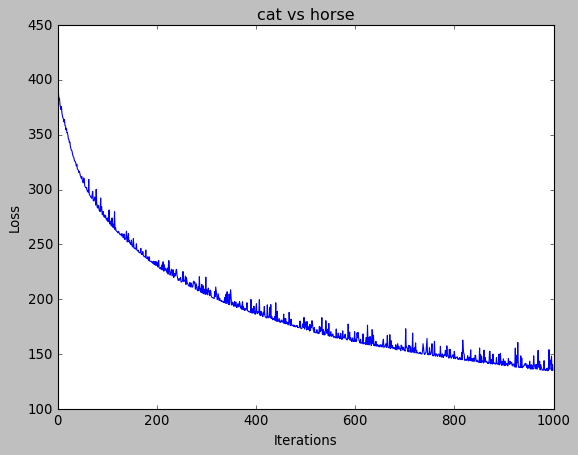

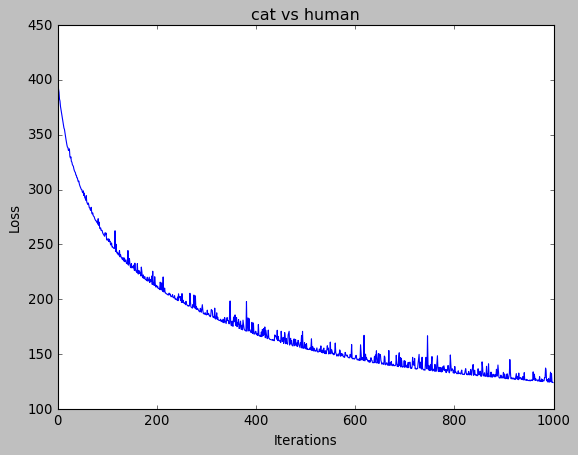

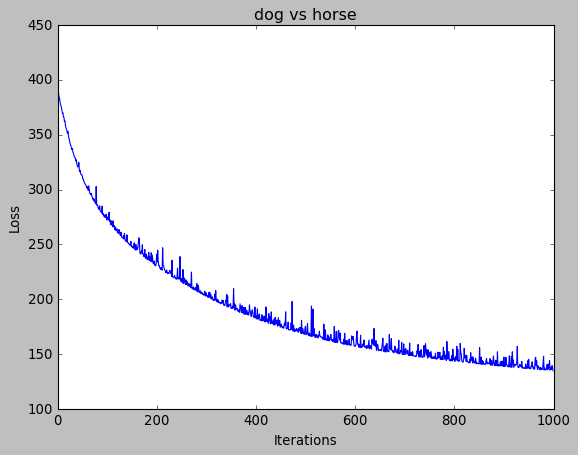

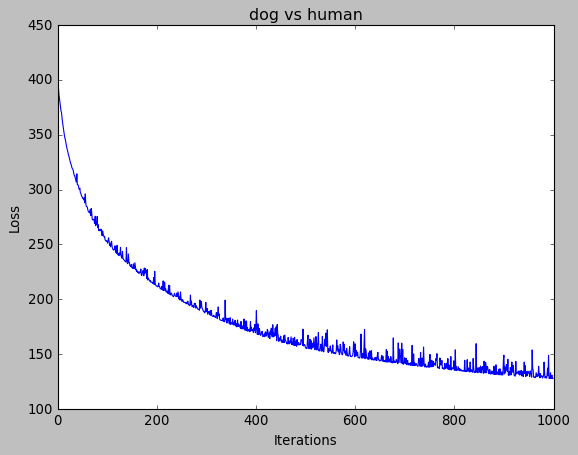

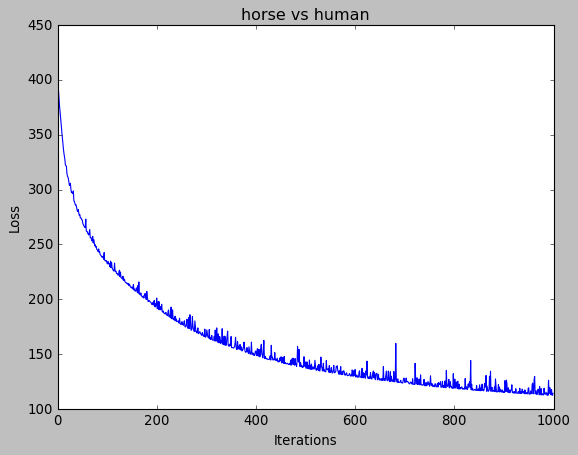

In [16]:
svm_classifiers=trainSVMs()

In [17]:
#Parameters for Cats and dogs
i=min(labels_dict['cat'], labels_dict['dog'])
j=max(labels_dict['cat'], labels_dict['dog'])
cats_dogs = svm_classifiers[i][j]
print(cats_dogs[0].shape) # Weight
print(cats_dogs[1]) # Bias

(1, 7500)
-3.0000000000000024e-05


## Prediction and Accuracy

In [18]:
def binaryPredict(x, w, b):
    z=np.dot(x, w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [19]:
# Prediction
def predict(x):
    count=np.zeros((classes_no,))
    for i in range(classes_no):
        for j in range(i+1, classes_no):
            w, b=svm_classifiers[i][j]
            z=binaryPredict(x, w, b)
            if z==-1:
                count[i]+=1
            elif z==1:
                count[j]+=1
    final_prediction=np.argmax(count)
    return final_prediction

In [20]:
# Accuracy
def accuracy(X, Y):
    count=0
    m=X.shape[0]
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=predict(x)
        if y_==y:
            count+=1
    return count/m

In [21]:
print(accuracy(image_data, labels))

0.6386138613861386


In [22]:
# Saving model
import joblib
joblib.dump(svm_classifiers, 'model.pkl')

['model.pkl']

## Comparison with Sklearn SVM

In [23]:
from sklearn import svm

In [24]:
svc=svm.SVC(kernel='linear', C=0.1)
svc.fit(image_data,labels)
svc.score(image_data,labels)

0.650990099009901